In [29]:
import json
import random
import pickle
from zipfile import ZipFile
from collections import namedtuple
import os

import matplotlib.pyplot as plt

# Reformat Captions File (one run for Train, another for Valid)

In [10]:
ZIP_PATH = "data/raw/annotations_trainval2017.zip"

INNER_PATH = "annotations/captions_train2017.json"
OUT_PATH = "data/train_captions.pickle"

#INNER_PATH = "annotations/captions_val2017.json"
#OUT_PATH = "data/valid_captions.pickle"

### Read Captions

In [11]:
def read_captions(zip_path, inner_path):
    with ZipFile(zip_path) as zf:
        with zf.open(inner_path, "r") as raw_json:
            return json.load(raw_json)

raw_json = read_captions(ZIP_PATH, INNER_PATH)

meta_images = raw_json["images"]
raw_annotations = raw_json["annotations"]

### Print Stats

In [12]:
print("Number of Images:", len(meta_images), "\n")
for key, val in meta_images[0].items():
    print(key, ": ", val, sep="")

Number of Images: 118287 

license: 3
file_name: 000000391895.jpg
coco_url: http://images.cocodataset.org/train2017/000000391895.jpg
height: 360
width: 640
date_captured: 2013-11-14 11:18:45
flickr_url: http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg
id: 391895


In [13]:
print("Number of Captions:", len(raw_annotations), "\n")

for key, val in raw_annotations[0].items():
    print(key, ": ", val, sep="")

Number of Captions: 591753 

image_id: 203564
id: 37
caption: A bicycle replica with a clock as the front wheel.


In [14]:
widths, heights = [], []
for image in meta_images:
    widths.append(image["width"])
    heights.append(image["height"])

print("Minimums:\t", min(widths), "w", min(heights), "h")
print("Maximums:\t", max(widths), "w", max(heights), "h")
print("Mean:   \t", round(sum(widths)/len(meta_images)), "w", round(sum(heights)/len(meta_images)), "h")

Minimums:	 59 w 51 h
Maximums:	 640 w 640 h
Mean:   	 578 w 484 h


Widths hist:


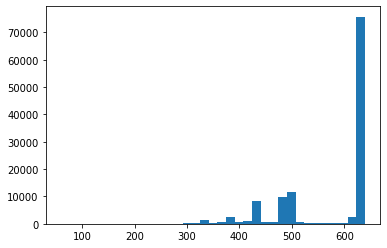

Heights hist:


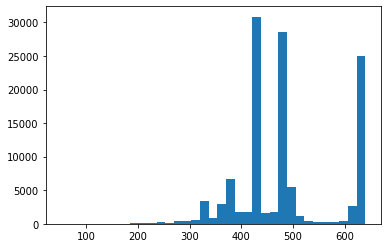

In [15]:
print("Widths hist:")
plt.hist(widths, bins=35)
plt.show()
print("Heights hist:")
plt.hist(heights, bins=35)
plt.show()

##### EfficientNet optimal image size by architecture

efficientnet-b0-224

efficientnet-b1-240

efficientnet-b2-260

efficientnet-b3-300

efficientnet-b4-380

efficientnet-b5-456

efficientnet-b6-528

efficientnet-b7-600

### Generate and save final captions

In [16]:
Caption = namedtuple("Caption", "image text")

def generate_captions(annotations):
    captions = []

    for annotation in raw_annotations:
        image = str(annotation["image_id"])  # + ".jpg"
        text = annotation["caption"]
        captions.append(Caption(image=image, text=text))

    random.shuffle(captions)
    return captions

captions = generate_captions(raw_annotations)

In [17]:
with open(OUT_PATH, "wb") as handler:
    pickle.dump(captions, handler)

# Reformat Captions File (3 runs for Train, Valid and Test)

In [45]:
ZIP_PATH = "data/raw/train2017.zip"
OUT_PATH = "data/train_images"

#ZIP_PATH = "data/raw/val2017.zip"
#OUT_PATH = "data/valid_images"

#ZIP_PATH = "data/raw/test2017.zip"
#OUT_PATH = "data/test_images"

In [44]:
def extract_images(zip_path, out_path):
    if not os.path.exists(out_path):
        os.mkdir(out_path)
    
    with ZipFile(zip_path) as zf:
        for in_file in zf.namelist():
            if in_file[-1] == "/":
                continue
            
            out_file = str(int(in_file[-16:-4])) + in_file[-4:]
            out_file = os.path.join(out_path, out_file)
            
            with zf.open(in_file, "r") as image:
                with open(out_file, "wb") as file:
                    file.write(image.read())
                

raw_json = extract_images(ZIP_PATH, OUT_PATH)

END!